In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import shap
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop(columns=['index'], inplace=True)

# **EXPLORATORY DATA ANALYSIS**

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df[df['duration'] == df['duration'].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [8]:
df[df['duration'] == df['duration'].min()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [9]:
df[df['price'] == df['price'].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [10]:
df[df['price'] == df['price'].min()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [11]:
df.groupby('airline')['price'].max()

airline
AirAsia       31917
Air_India     90970
GO_FIRST      32803
Indigo        31952
SpiceJet      34158
Vistara      123071
Name: price, dtype: int64

In [12]:
df.groupby('airline')['price'].min()

airline
AirAsia      1105
Air_India    1526
GO_FIRST     1105
Indigo       1105
SpiceJet     1106
Vistara      1714
Name: price, dtype: int64

# **CASE STUDY**

### **1.What are the airlines in the dataset, accompanied by their frequencies?**


In [13]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

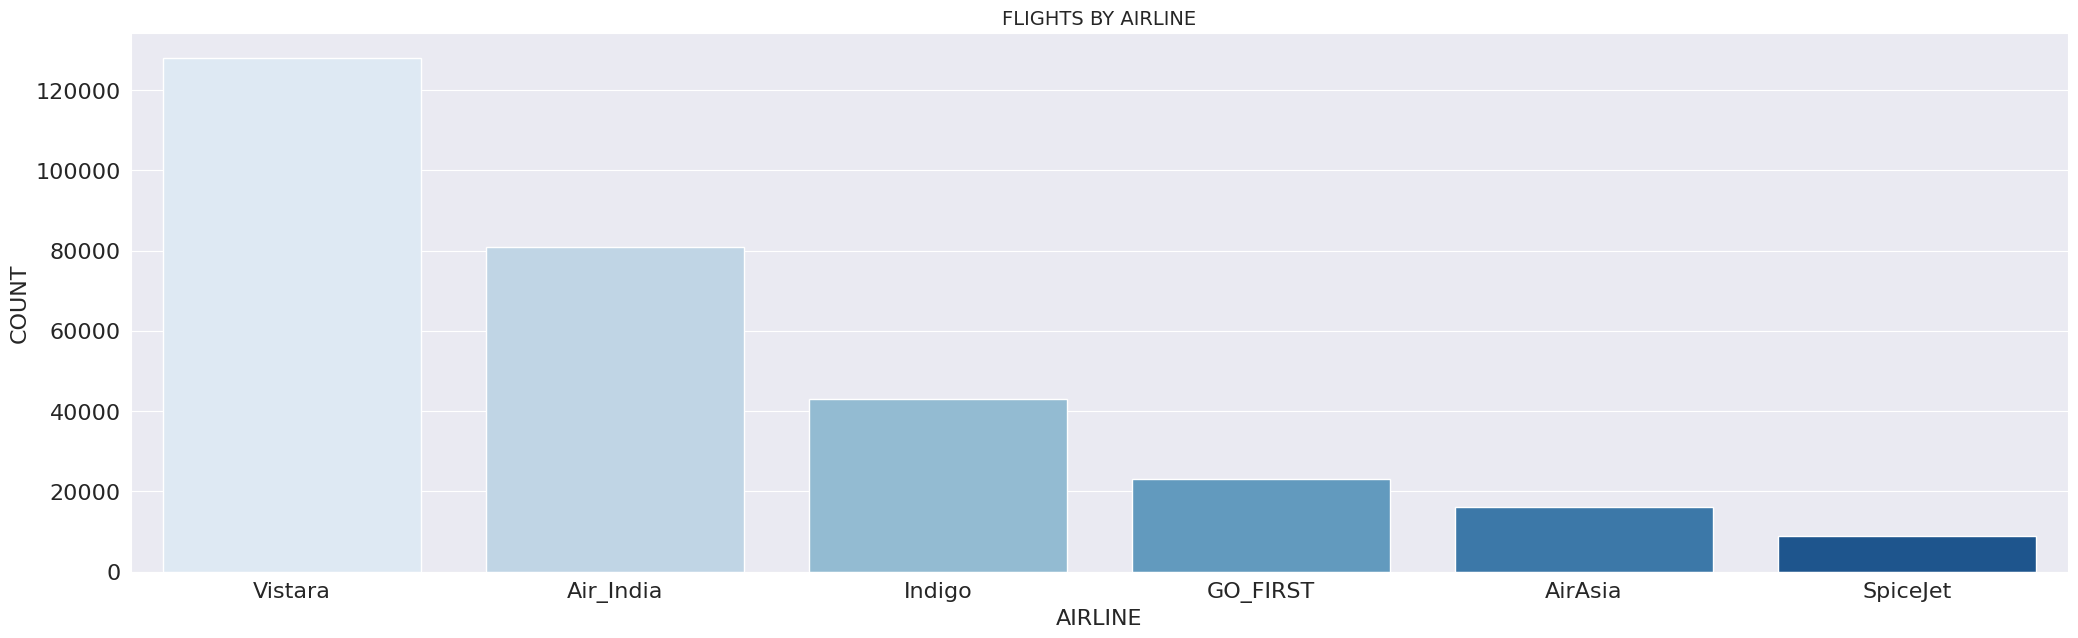

In [69]:
airline_counts = df['airline'].value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(25,7))
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='Blues')
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('COUNT',fontsize=16)
plt.title('FLIGHTS BY AIRLINE', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### **2.Show Bar Graphs representing the Departure Time & Arrival Time.**


In [15]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [16]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

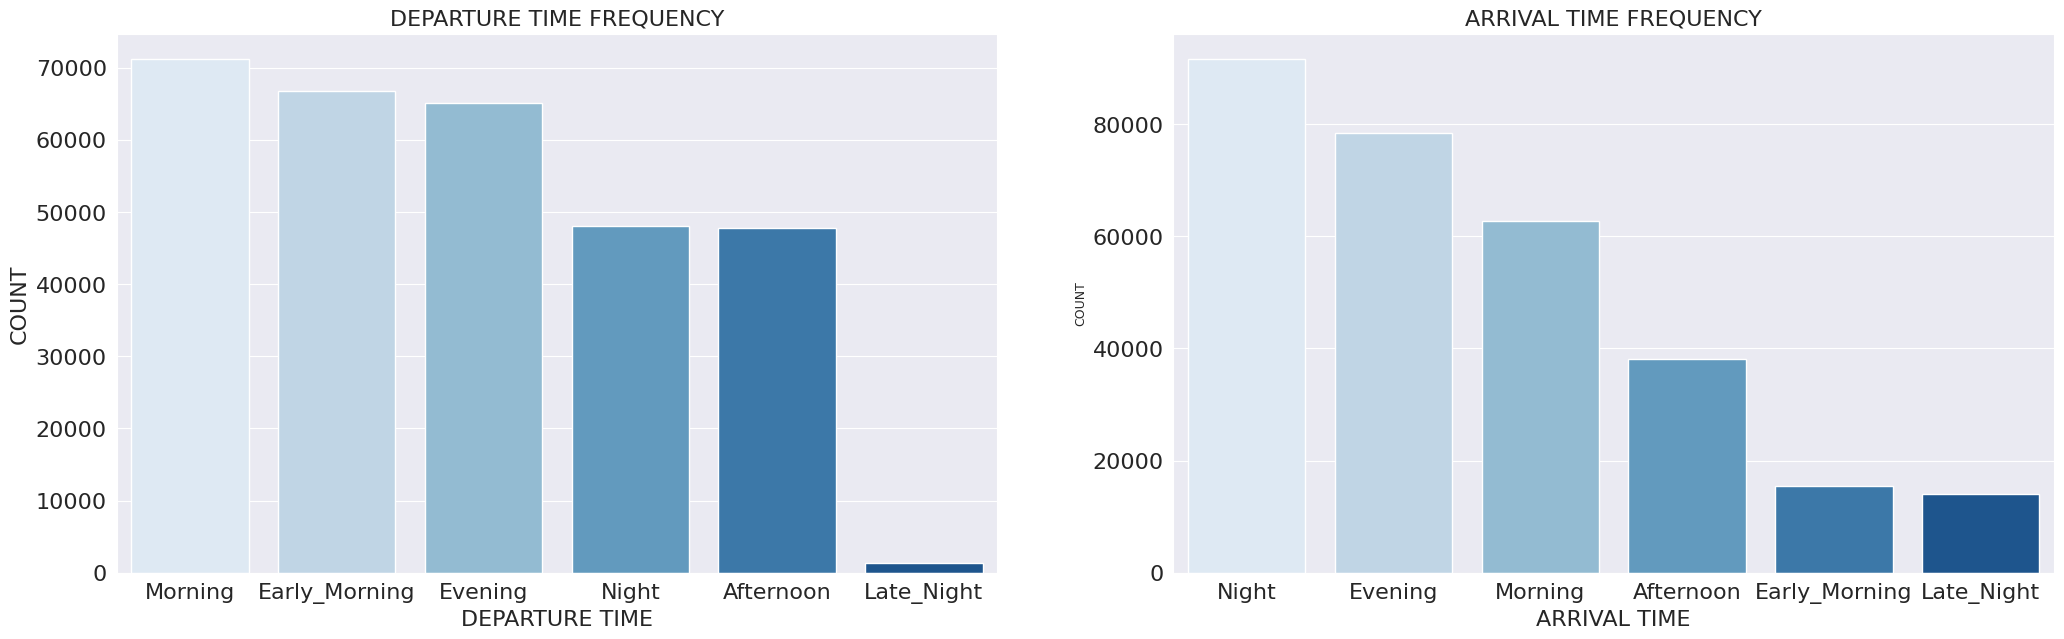

In [70]:
departure_time = df['departure_time'].value_counts()
arrival_time = df['arrival_time'].value_counts()

sns.set_style('darkgrid')

plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.barplot(x=departure_time.index, y=departure_time.values, palette='Blues')
plt.xlabel('DEPARTURE TIME', fontsize=16)
plt.ylabel('COUNT',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,2,1)
plt.title('DEPARTURE TIME FREQUENCY', fontsize=16)

plt.subplot(1,2,2)
sns.barplot(x=arrival_time.index, y=arrival_time.values, palette='Blues')
plt.xlabel('ARRIVAL TIME', fontsize=16)
plt.ylabel('COUNT',fontsize=9)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,2,2)
plt.title('ARRIVAL TIME FREQUENCY', fontsize=16)
plt.show()

### **3.Show Bar Graphs representing the Source City & Destination City**

In [18]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [19]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

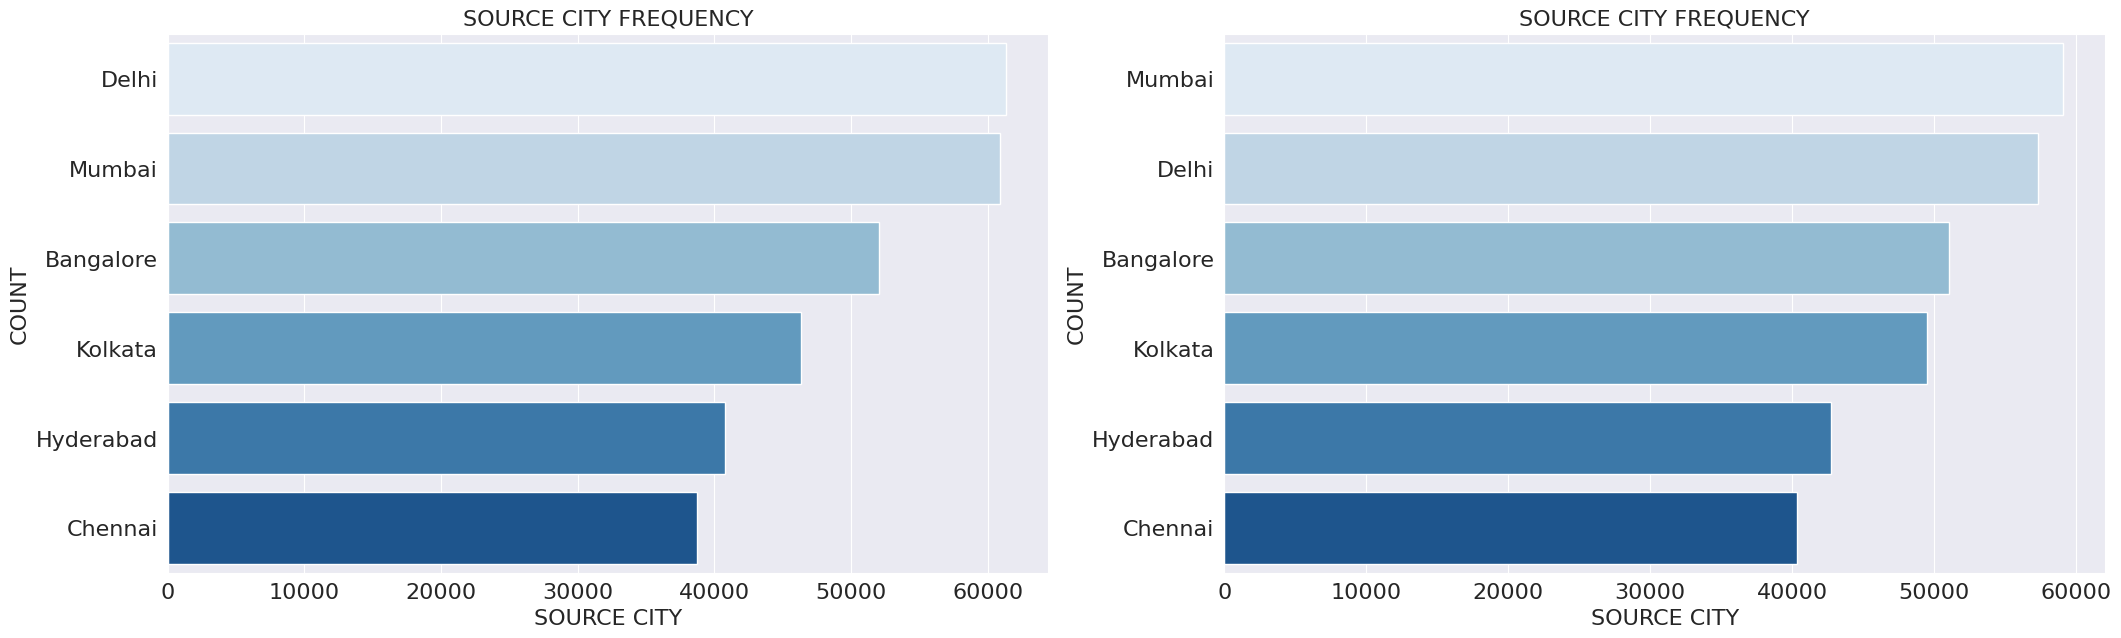

In [72]:
source_city = df['source_city'].value_counts()
destination_city = df['destination_city'].value_counts()

plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.barplot(x=source_city.values, y=source_city.index, palette='Blues')
plt.xlabel('SOURCE CITY', fontsize=16)
plt.ylabel('COUNT', fontsize=16)
plt.title('SOURCE CITY FREQUENCY', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.barplot(x=destination_city.values, y=destination_city.index, palette='Blues')
plt.xlabel('SOURCE CITY', fontsize=16)
plt.ylabel('COUNT', fontsize=16)
plt.title('SOURCE CITY FREQUENCY', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()


### **4.Does price varies with airlines?**

In [21]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

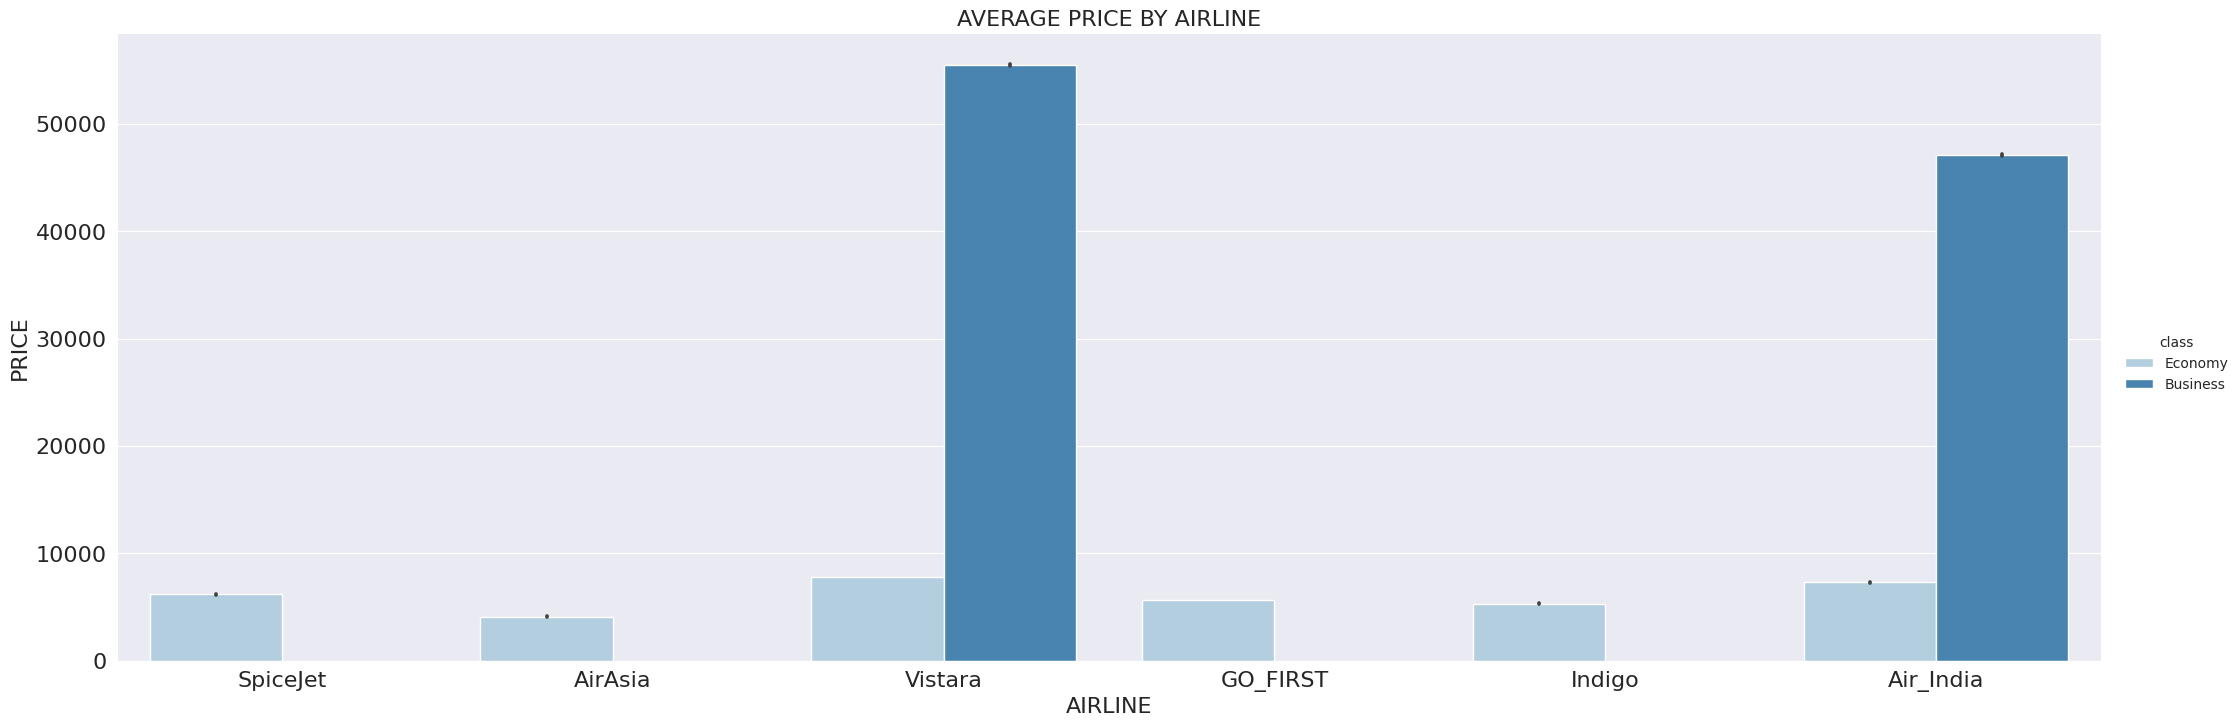

In [84]:
sns.catplot(x='airline', y='price', kind='bar', palette='Blues', data=df, hue='class', height=7, aspect=3)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.title('AVERAGE PRICE BY AIRLINE',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### **5.Does ticket price change based on the departure time and arrival time?**

In [23]:
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [24]:
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

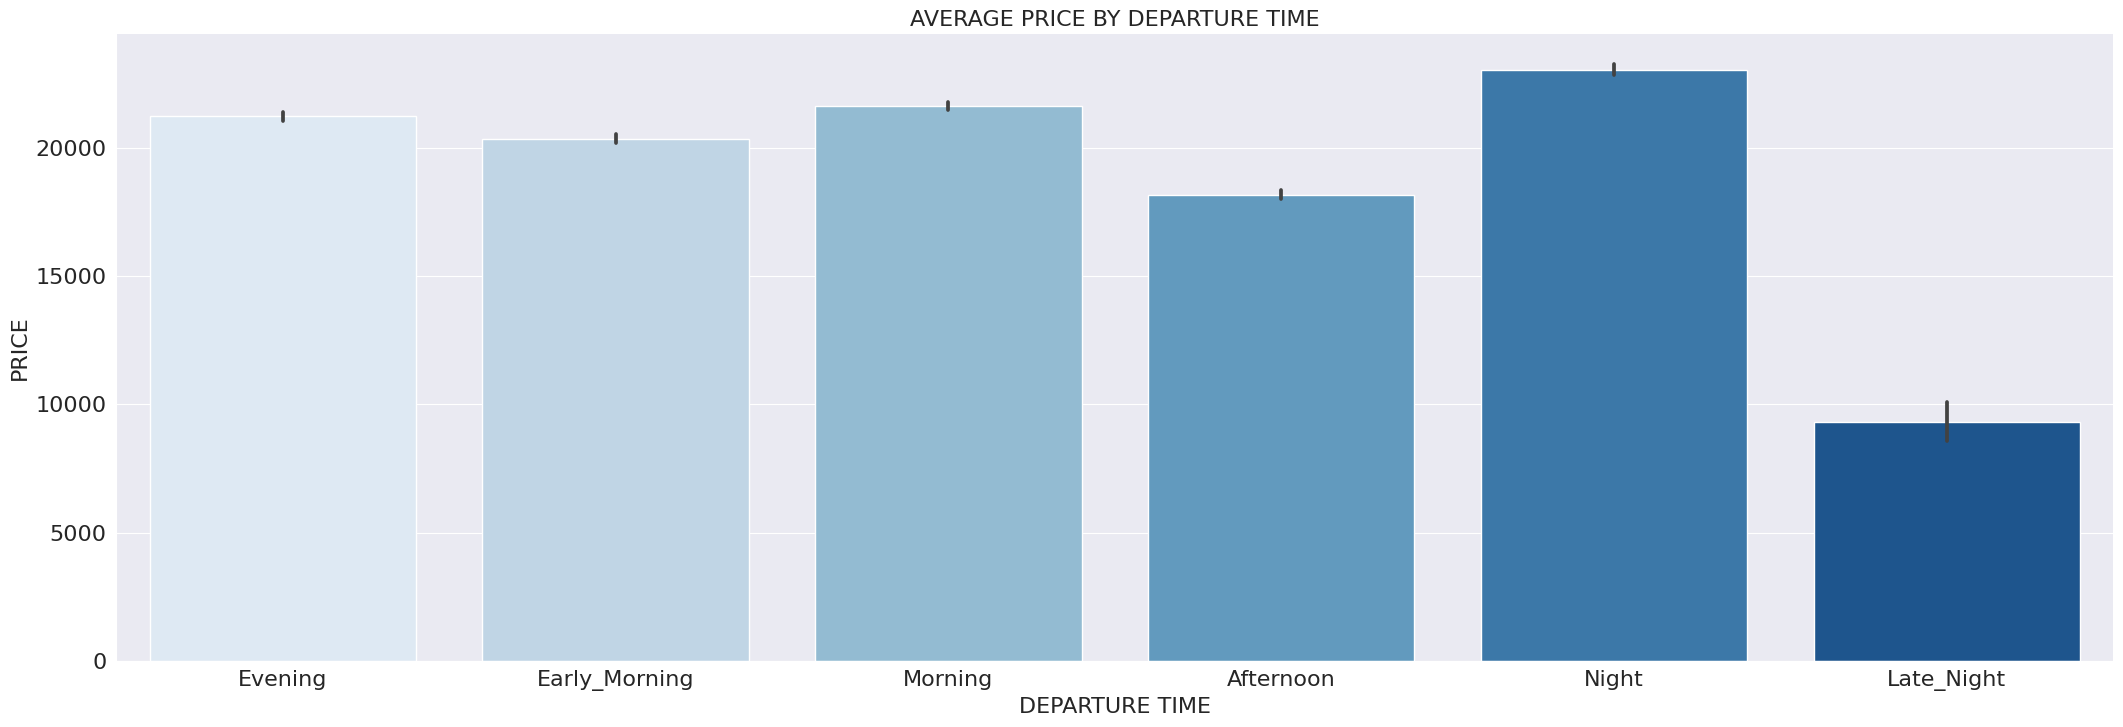

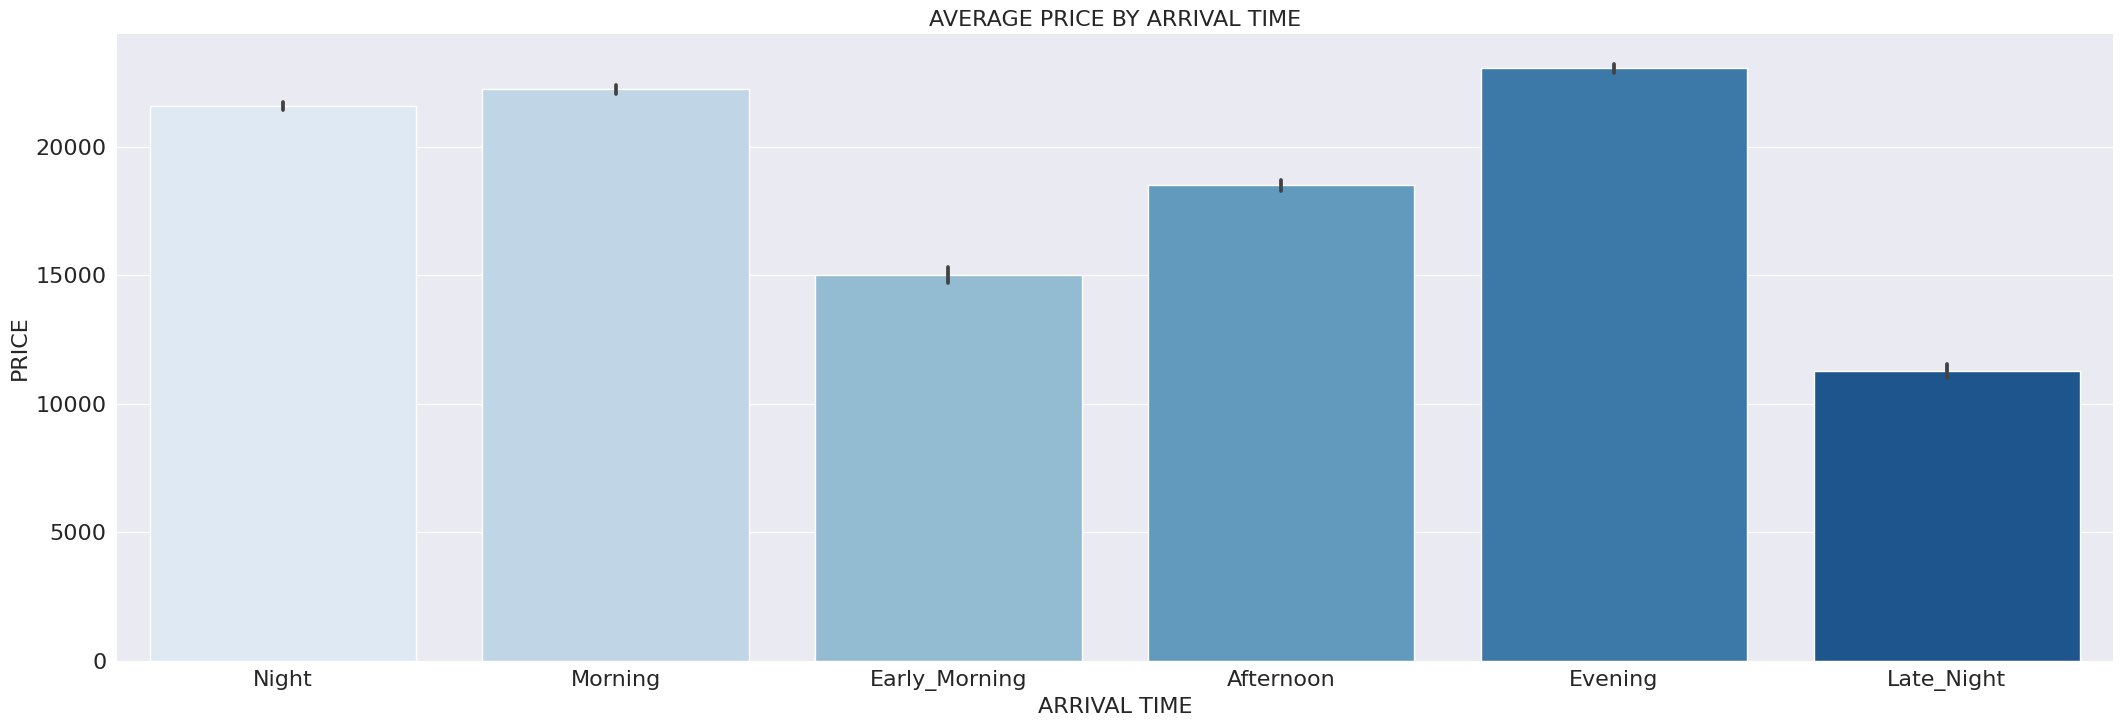

In [75]:
sns.catplot(x='departure_time', y='price', kind='bar', data=df, palette='Blues', height=7, aspect=3)
plt.xlabel('DEPARTURE TIME', fontsize=16)
plt.ylabel('PRICE',fontsize=16)
plt.title('AVERAGE PRICE BY DEPARTURE TIME', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

sns.catplot(x='arrival_time', y='price', kind='bar', data=df, palette='Blues', height=7, aspect=3)
plt.xlabel('ARRIVAL TIME', fontsize=16)
plt.ylabel('PRICE',fontsize=16)
plt.title('AVERAGE PRICE BY ARRIVAL TIME', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


plt.show()

### **6.How the price changes with change in Source and Destination?**

In [26]:
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [27]:
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

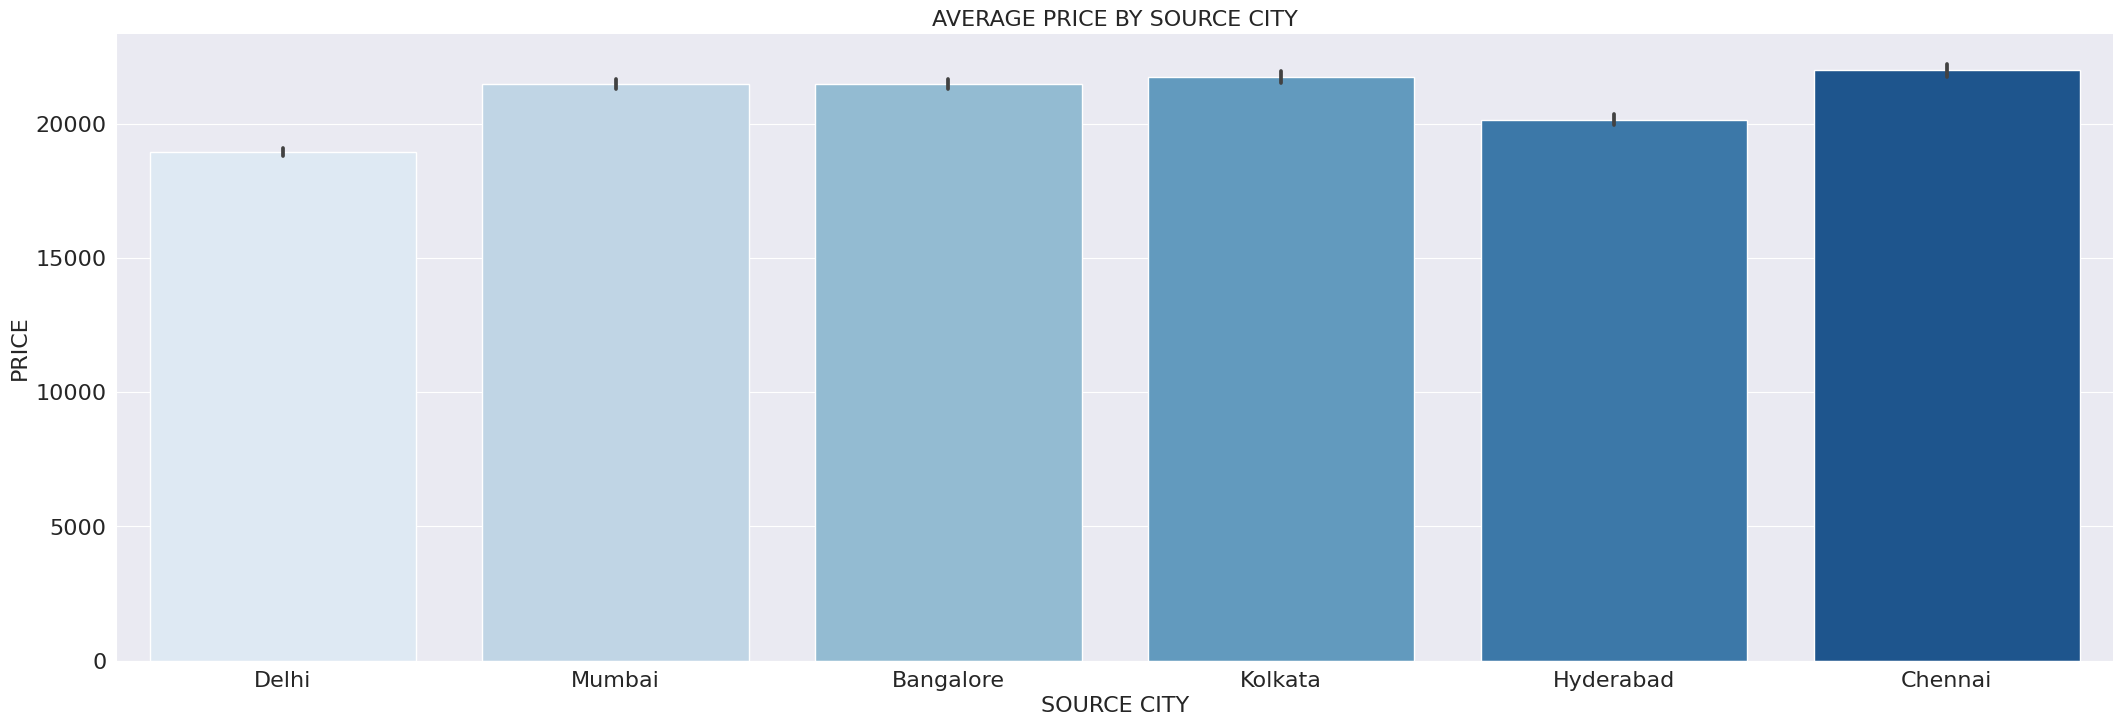

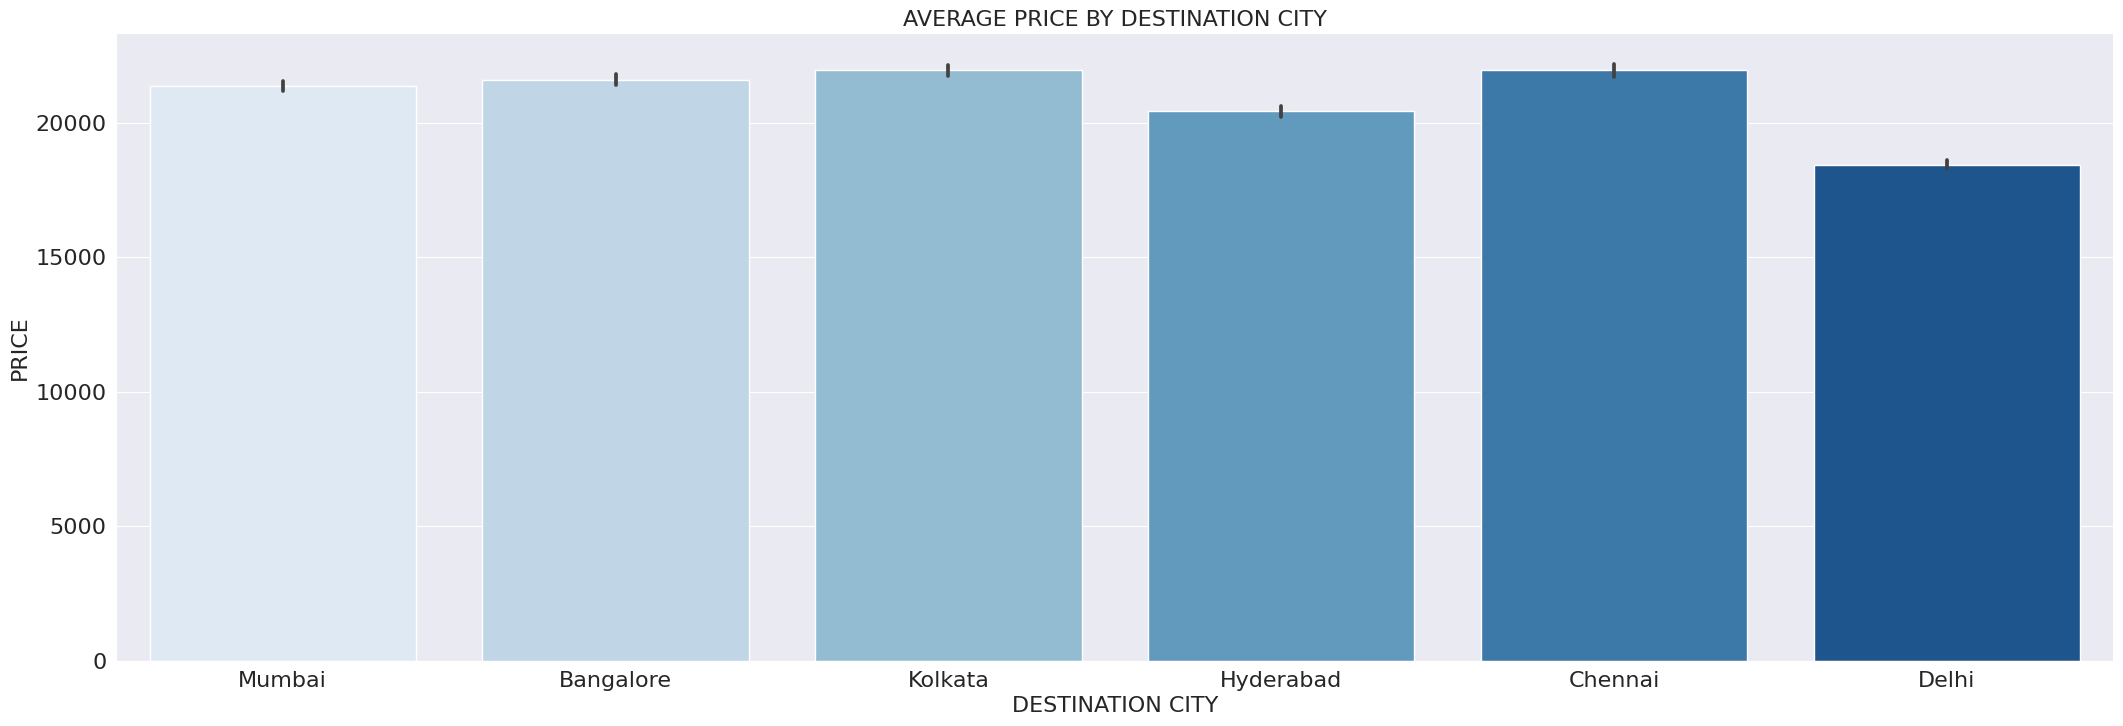

In [76]:
sns.catplot(x='source_city', y='price', kind='bar', data=df, palette='Blues', height=7, aspect=3)
plt.xlabel('SOURCE CITY', fontsize=16)
plt.ylabel('PRICE',fontsize=16)
plt.title('AVERAGE PRICE BY SOURCE CITY', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

sns.catplot(x='destination_city', y='price', kind='bar', data=df, palette='Blues', height=7, aspect=3)
plt.xlabel('DESTINATION CITY', fontsize=16)
plt.ylabel('PRICE',fontsize=16)
plt.title('AVERAGE PRICE BY DESTINATION CITY', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### **7.How is the price affected when tickets are bought in just 1 or 2 days before departure?**

In [29]:
media_por_dia = df[df['days_left'].isin([1, 2])].groupby('days_left')['price'].mean().reset_index()
print(media_por_dia)


   days_left         price
0          1  21591.867151
1          2  30211.299801


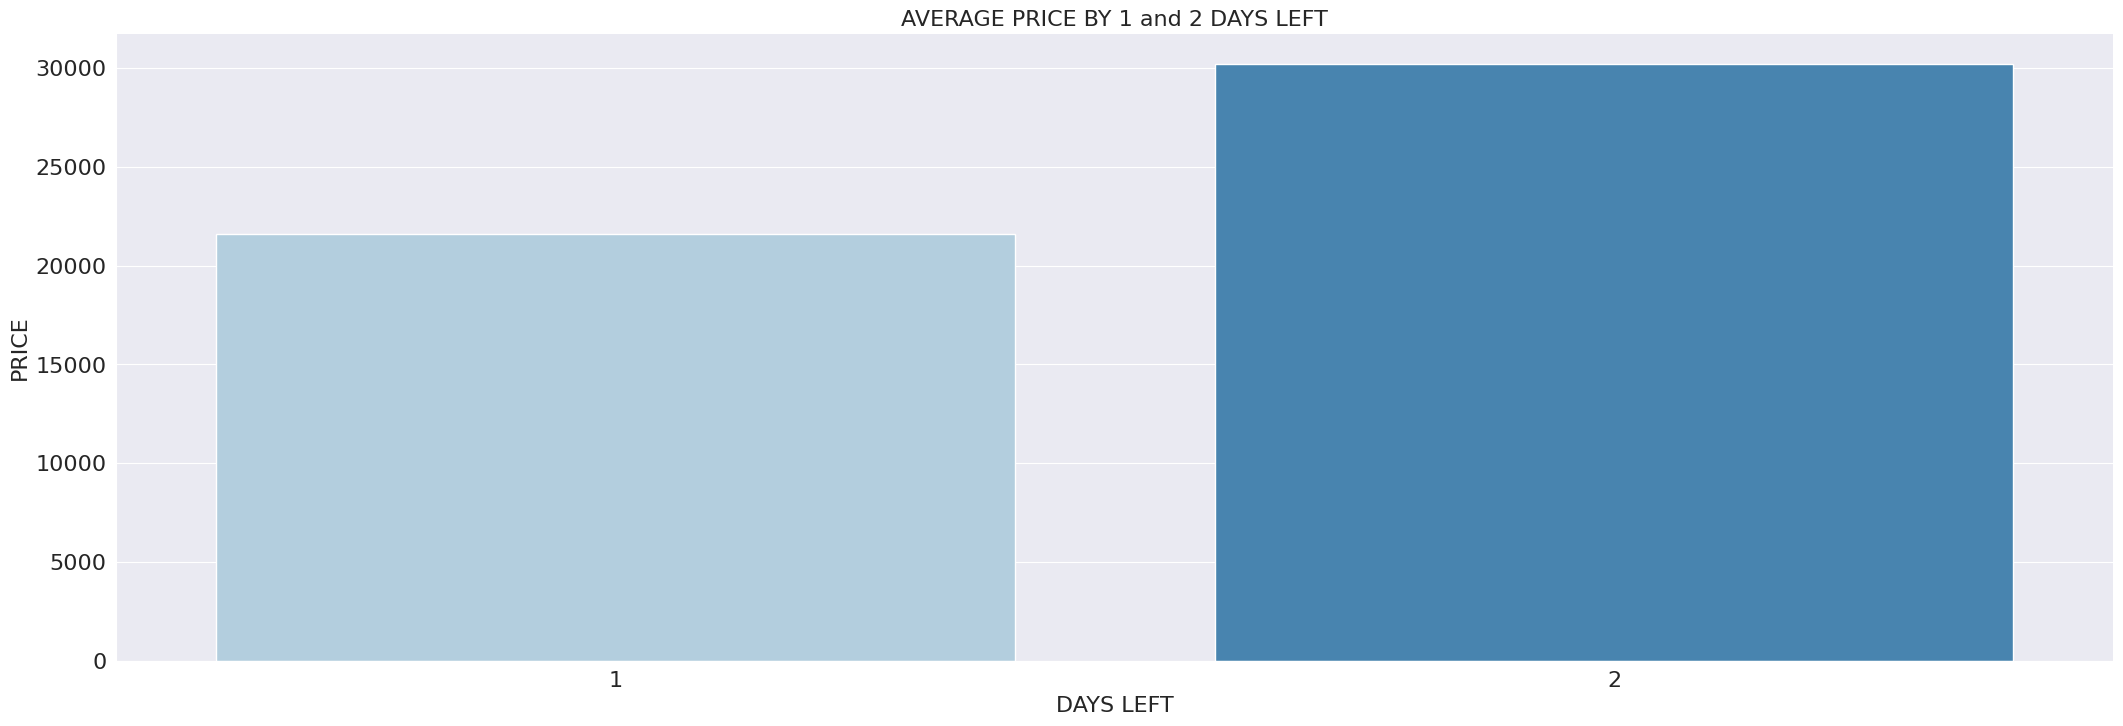

In [77]:
sns.catplot(x='days_left', y='price', kind='bar', data=media_por_dia, palette='Blues', height=7, aspect=3)
plt.xlabel('DAYS LEFT', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.title('AVERAGE PRICE BY 1 and 2 DAYS LEFT', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [31]:
df.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

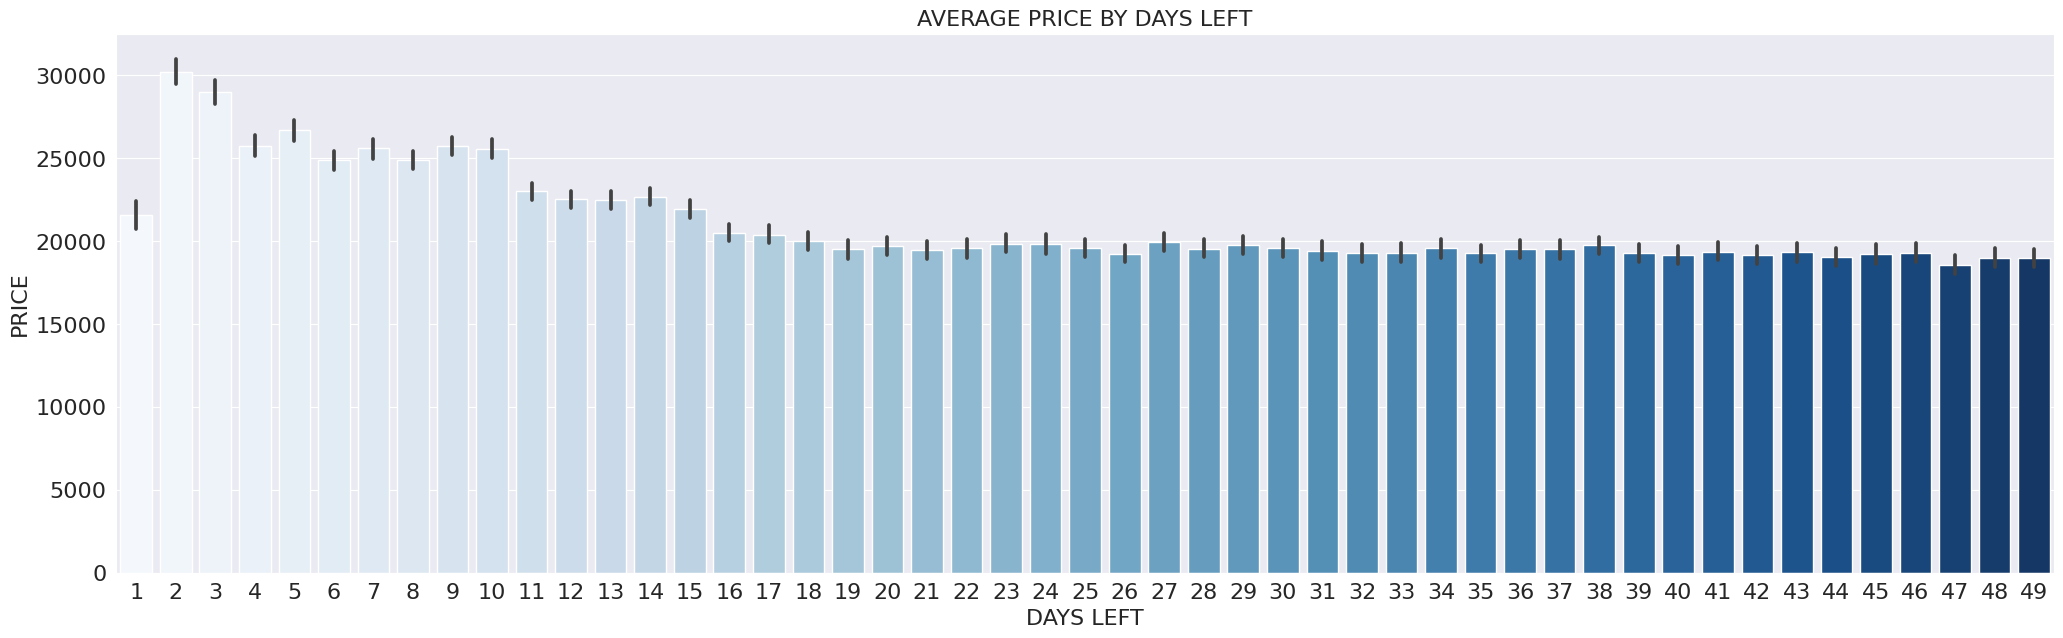

In [78]:
plt.figure(figsize=(25,7))
sns.barplot(x='days_left', y= 'price', data=df, palette='Blues')
plt.xlabel('DAYS LEFT', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.title('AVERAGE PRICE BY DAYS LEFT', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


### **8.How does the ticket price vary between Economy and Business class?**

In [33]:
df.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

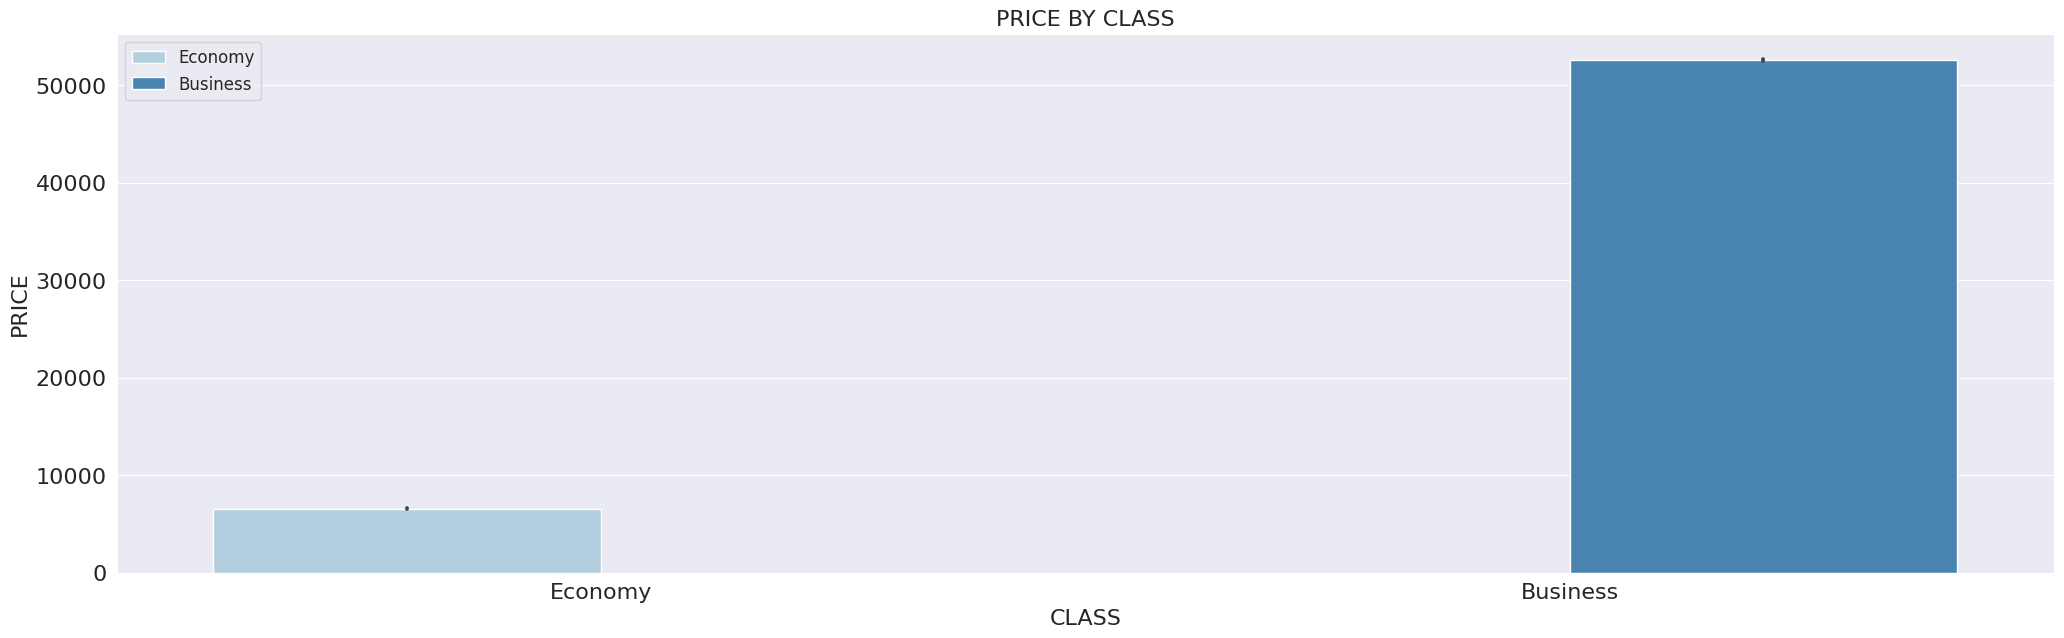

In [80]:
plt.figure(figsize=(25,7))
sns.barplot(x='class', y='price', data=df, palette='Blues', hue='class')
plt.xlabel('CLASS', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.title('PRICE BY CLASS', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12)
plt.show()

### **9.What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class?**

In [35]:
question9_df = df [(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad') & (df['class'] == 'Business')]
question9_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [36]:
price = round(question9_df['price'].mean(), 0)
print ('The Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class is:', price)


The Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class is: 47940.0


# **FEATURES ENGINEERING**

In [37]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
df_new = df.copy()

In [39]:
df_new.drop(columns= 'flight', inplace=True)

In [40]:
df_new['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [41]:
df_new['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

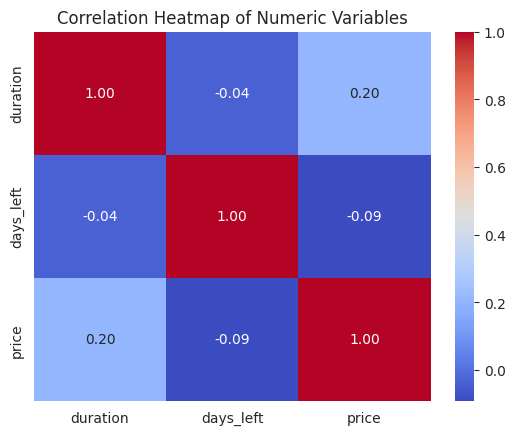

In [42]:
corr = df_new.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [43]:
# Diccionario de mapeo
franjas = {
    "Late_Night":    "02:00:00",
    "Early_Morning": "05:00:00",
    "Morning":       "09:00:00",
    "Afternoon":     "15:00:00",
    "Evening":       "19:00:00",
    "Night":         "22:00:00"
}

# Reemplazar con la hora correspondiente
df_new["departure_time"] = df_new["departure_time"].map(franjas)

# Convertir a tipo time
df_new["departure_time"] = pd.to_datetime(df_new["departure_time"], format="%H:%M:%S").dt.time




In [44]:
# Reemplazar con la hora correspondiente
df_new["arrival_time"] = df_new["arrival_time"].map(franjas)

# Convertir a tipo time
df_new["arrival_time"] = pd.to_datetime(df_new["arrival_time"], format="%H:%M:%S").dt.time

In [45]:
# Encoding cíclico para las franjas horarias
def encode_time(df_new, col):
    seconds = df_new[col].apply(lambda t: t.hour*3600 + t.minute*60 + t.second)
    df_new[col+"_sin"] = np.sin(2 * np.pi * seconds / 86400)
    df_new[col+"_cos"] = np.cos(2 * np.pi * seconds / 86400)
    return df_new

df_new = encode_time(df_new, "departure_time")
df_new = encode_time(df_new, "arrival_time")

In [46]:
# Definimos las variables con más y menos clases para el codificador
low_card = ["airline", "stops", "class"] # pocas clases → OHE
high_card = ["source_city", "destination_city"] # muchas clases → Target Encoding

preprocessor = ColumnTransformer(
    transformers=[
        ("low_card_ohe", OneHotEncoder(handle_unknown="ignore"), low_card),
        ("high_card_target", TargetEncoder(), high_card)
    ],
    remainder="passthrough"  # deja el resto de columnas tal cual
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())  # pon aquí tu modelo
])

In [47]:
df_new.drop(columns='departure_time', inplace=True)


In [48]:
df_new.drop(columns='arrival_time', inplace=True)

In [49]:
# numéricas/passthrough (ajusta si tienes más)
num_cols = [c for c in df_new.columns 
            if c not in low_card + high_card + ["price"]]   # quita la y si está en X

In [50]:
# 2) Crea los transformadores
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # nombres expandibles
tgt = TargetEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe_low", ohe, low_card),
        ("tgt_high", tgt, high_card),
        ("num", "passthrough", num_cols)
    ],
    verbose_feature_names_out=False
)

In [51]:
# 3) Haz que devuelva un **DataFrame** (no una matriz)
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('ohe_low',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['airline', 'stops', 'class']),
                                ('tgt_high', TargetEncoder(),
                                 ['source_city', 'destination_city']),
                                ('num', 'passthrough',
                                 ['duration', 'days_left', 'departure_time_sin',
                                  'departure_time_cos', 'arrival_time_sin',
                                  'arrival_time_cos'])],
                  verbose_feature_names_out=False)

In [52]:
# 4) Separa X, y y transforma
y = df_new["price"]
X = df_new.drop(columns=["price"])

X_enc = preprocessor.fit_transform(X, y)   # ← TargetEncoder necesita y

In [53]:
# 5) Revisa resultado
print(X_enc.columns.tolist()[:25])  # ver primeros nombres
X_enc.head()

['airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara', 'stops_one', 'stops_two_or_more', 'stops_zero', 'class_Business', 'class_Economy', 'source_city', 'destination_city', 'duration', 'days_left', 'departure_time_sin', 'departure_time_cos', 'arrival_time_sin', 'arrival_time_cos']


,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy,source_city,destination_city,duration,days_left,departure_time_sin,departure_time_cos,arrival_time_sin,arrival_time_cos
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,18951.326639,21372.529469,2.17,1,-0.965926,0.258819,-0.500000,0.866025
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,18951.326639,21372.529469,2.33,1,0.965926,0.258819,0.707107,-0.707107
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,18951.326639,21372.529469,2.17,1,0.965926,0.258819,0.965926,0.258819
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,18951.326639,21372.529469,2.25,1,0.707107,-0.707107,-0.707107,-0.707107
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,18951.326639,21372.529469,2.33,1,0.707107,-0.707107,0.707107,-0.707107


# **ML MODELS AND EVALUATION**

In [54]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

# Entrenamos RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicción
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, preds)

# R² (Coeficiente de determinación)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R²:   {r2:.4f}")

RMSE: 2,774.16
MAE:  1,075.83
R²:   0.9851


In [55]:
# Modelo base
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Espacio de búsqueda
param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 6, 8, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,               # número de combinaciones a probar
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Mejor modelo
best_xgb = random_search.best_estimator_
print("Mejores parámetros:", random_search.best_params_)

# Predicciones
preds = best_xgb.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R²:   {r2:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros: {'subsample': 1.0, 'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}
RMSE: 2,458.58
MAE:  1,258.63
R²:   0.9883


In [56]:
# XGBoost Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X_enc):
    X_train, X_test = X_enc.iloc[train_idx], X_enc.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Entrenar
    best_xgb.fit(X_train, y_train)
    
    # Predecir
    preds = best_xgb.predict(X_test)
    
    # Métricas
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    mae_scores.append(mean_absolute_error(y_test, preds))
    r2_scores.append(r2_score(y_test, preds))

# Resultados
print("📊 XGBoost")
print("RMSE por fold:", rmse_scores)
print("MAE por fold:", mae_scores)
print("R² por fold:", r2_scores)

print("\nPromedios:")
print(f"RMSE medio: {np.mean(rmse_scores):,.2f} ± {np.std(rmse_scores):.2f}")
print(f"MAE medio:  {np.mean(mae_scores):,.2f} ± {np.std(mae_scores):.2f}")
print(f"R² medio:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

📊 XGBoost
RMSE por fold: [2458.581620710177, 2430.2753569624438, 2455.7461470454214, 2473.094920448661, 2429.885715398126]
MAE por fold: [1258.631701793551, 1251.4457718248566, 1274.2230557450307, 1257.2291140699792, 1257.9916161314281]
R² por fold: [0.9882738478205182, 0.9885573174488035, 0.9882888347373722, 0.9881418013929509, 0.9885031376654303]

Promedios:
RMSE medio: 2,449.52 ± 16.93
MAE medio:  1,259.90 ± 7.60
R² medio:   0.9884 ± 0.0002


In [57]:
# RandomForestRegressor Cross Validation
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Cross Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X_enc):
    X_train, X_test = X_enc.iloc[train_idx], X_enc.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)
    
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    mae_scores.append(mean_absolute_error(y_test, preds))
    r2_scores.append(r2_score(y_test, preds))

print("📊 RandomForest")
print("RMSE por fold:", rmse_scores)
print("MAE por fold:", mae_scores)
print("R² por fold:", r2_scores)

print("\nPromedios:")
print(f"RMSE medio: {np.mean(rmse_scores):,.2f} ± {np.std(rmse_scores):.2f}")
print(f"MAE medio:  {np.mean(mae_scores):,.2f} ± {np.std(mae_scores):.2f}")
print(f"R² medio:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

📊 RandomForest
RMSE por fold: [2764.2436860423827, 2730.88367323717, 2710.4547542572122, 2717.4439348411806, 2679.97774849615]
MAE por fold: [1071.0650716570694, 1061.0252021783094, 1076.4131363122488, 1060.455053690341, 1054.8170366800414]
R² por fold: [0.9851769041388689, 0.9855514825974288, 0.9857334983524717, 0.9856827920038108, 0.986014757172144]

Promedios:
RMSE medio: 2,720.60 ± 27.47
MAE medio:  1,064.76 ± 7.83
R² medio:   0.9856 ± 0.0003


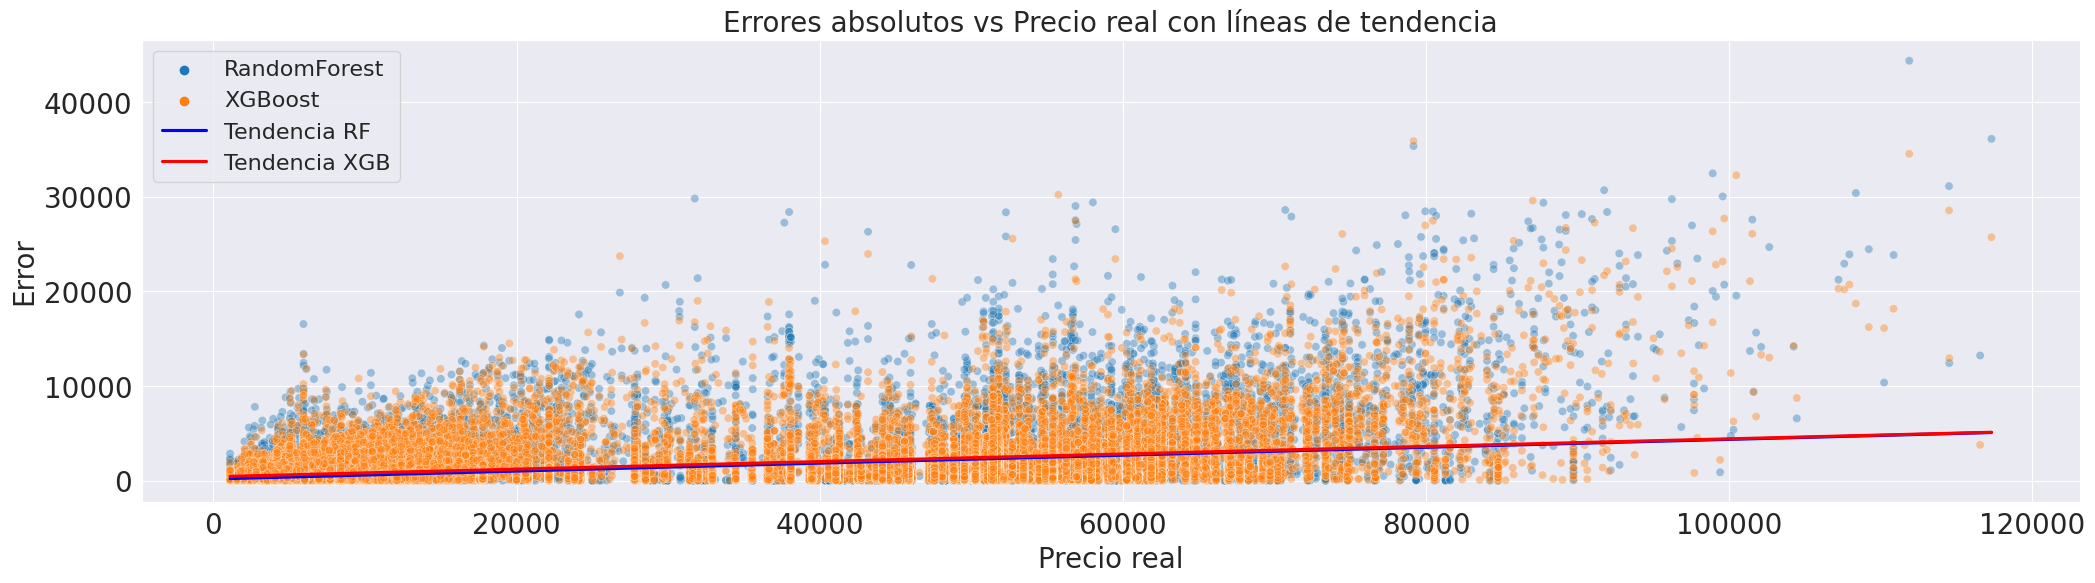

In [106]:
# MAE vs Precio Real
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

best_xgb.fit(X_train, y_train)
xgb_preds = best_xgb.predict(X_test)

# Errores absolutos
rf_errors = np.abs(rf_preds - y_test)
xgb_errors = np.abs(xgb_preds - y_test)

# DataFrame para seaborn
import pandas as pd
df_plot = pd.DataFrame({
    "Precio_real": y_test,
    "Error": rf_errors,
    "Modelo": "RandomForest"
})
df_plot = pd.concat([
    df_plot,
    pd.DataFrame({
        "Precio_real": y_test,
        "Error": xgb_errors,
        "Modelo": "XGBoost"
    })
])

# --- Gráfico ---
plt.figure(figsize=(25,6))
sns.scatterplot(data=df_plot, x="Precio_real", y="Error", hue="Modelo", alpha=0.4)
sns.regplot(data=df_plot[df_plot["Modelo"]=="RandomForest"],
            x="Precio_real", y="Error", scatter=False, color="blue", label="Tendencia RF")
sns.regplot(data=df_plot[df_plot["Modelo"]=="XGBoost"],
            x="Precio_real", y="Error", scatter=False, color="red", label="Tendencia XGB")

plt.title("Errores absolutos vs Precio real con líneas de tendencia",fontsize=20)
plt.xlabel("Precio real", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.show()

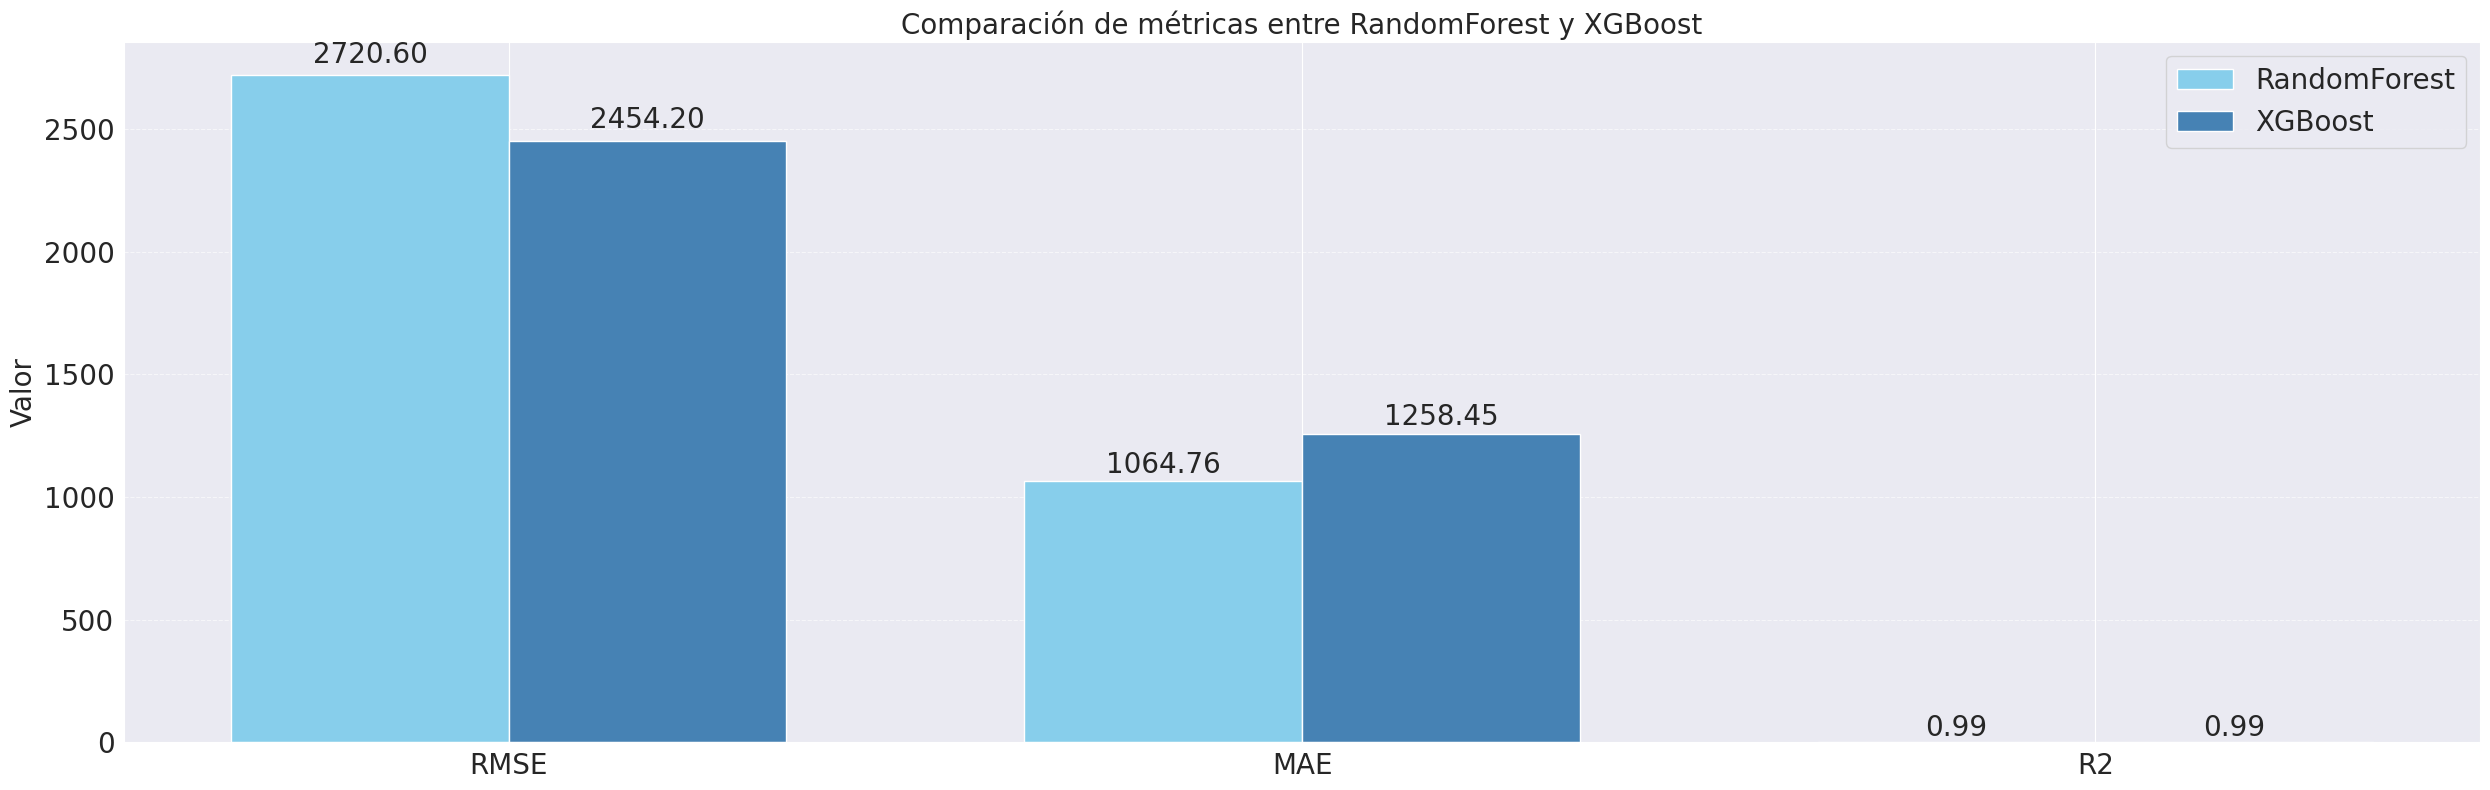

In [105]:
# Datos de resultados promedio
resultados = {
    "RandomForest": {
        "RMSE": 2720.60,
        "MAE": 1064.76,
        "R2": 0.9856
    },
    "XGBoost": {
        "RMSE": 2454.20,
        "MAE": 1258.45,
        "R2": 0.9883
    }
}

# Configuración
metricas = ["RMSE", "MAE", "R2"]
x = np.arange(len(metricas))  # posiciones
ancho = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(25, 8))

# Barras para RF y XGB
rf_vals = [resultados["RandomForest"][m] for m in metricas]
xgb_vals = [resultados["XGBoost"][m] for m in metricas]

ax.bar(x - ancho/2, rf_vals, ancho, label="RandomForest", color="skyblue")
ax.bar(x + ancho/2, xgb_vals, ancho, label="XGBoost", color="steelblue")

# Etiquetas y formato
ax.set_ylabel("Valor", fontsize=20)
ax.set_title("Comparación de métricas entre RandomForest y XGBoost", fontsize=20)

# Ticks del eje X
ax.set_xticks(x)                              
ax.set_xticklabels(metricas, fontsize=20)     
ax.tick_params(axis='y', labelsize=20)        

ax.legend(fontsize=20)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores sobre las barras
for i, v in enumerate(rf_vals):
    ax.text(i - ancho/2, v + max(0.01*v, 0.005), f"{v:.2f}", ha='center', va='bottom', fontsize=20)

for i, v in enumerate(xgb_vals):
    ax.text(i + ancho/2, v + max(0.01*v, 0.005), f"{v:.2f}", ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

# **FEATURE IMPORTANCES**

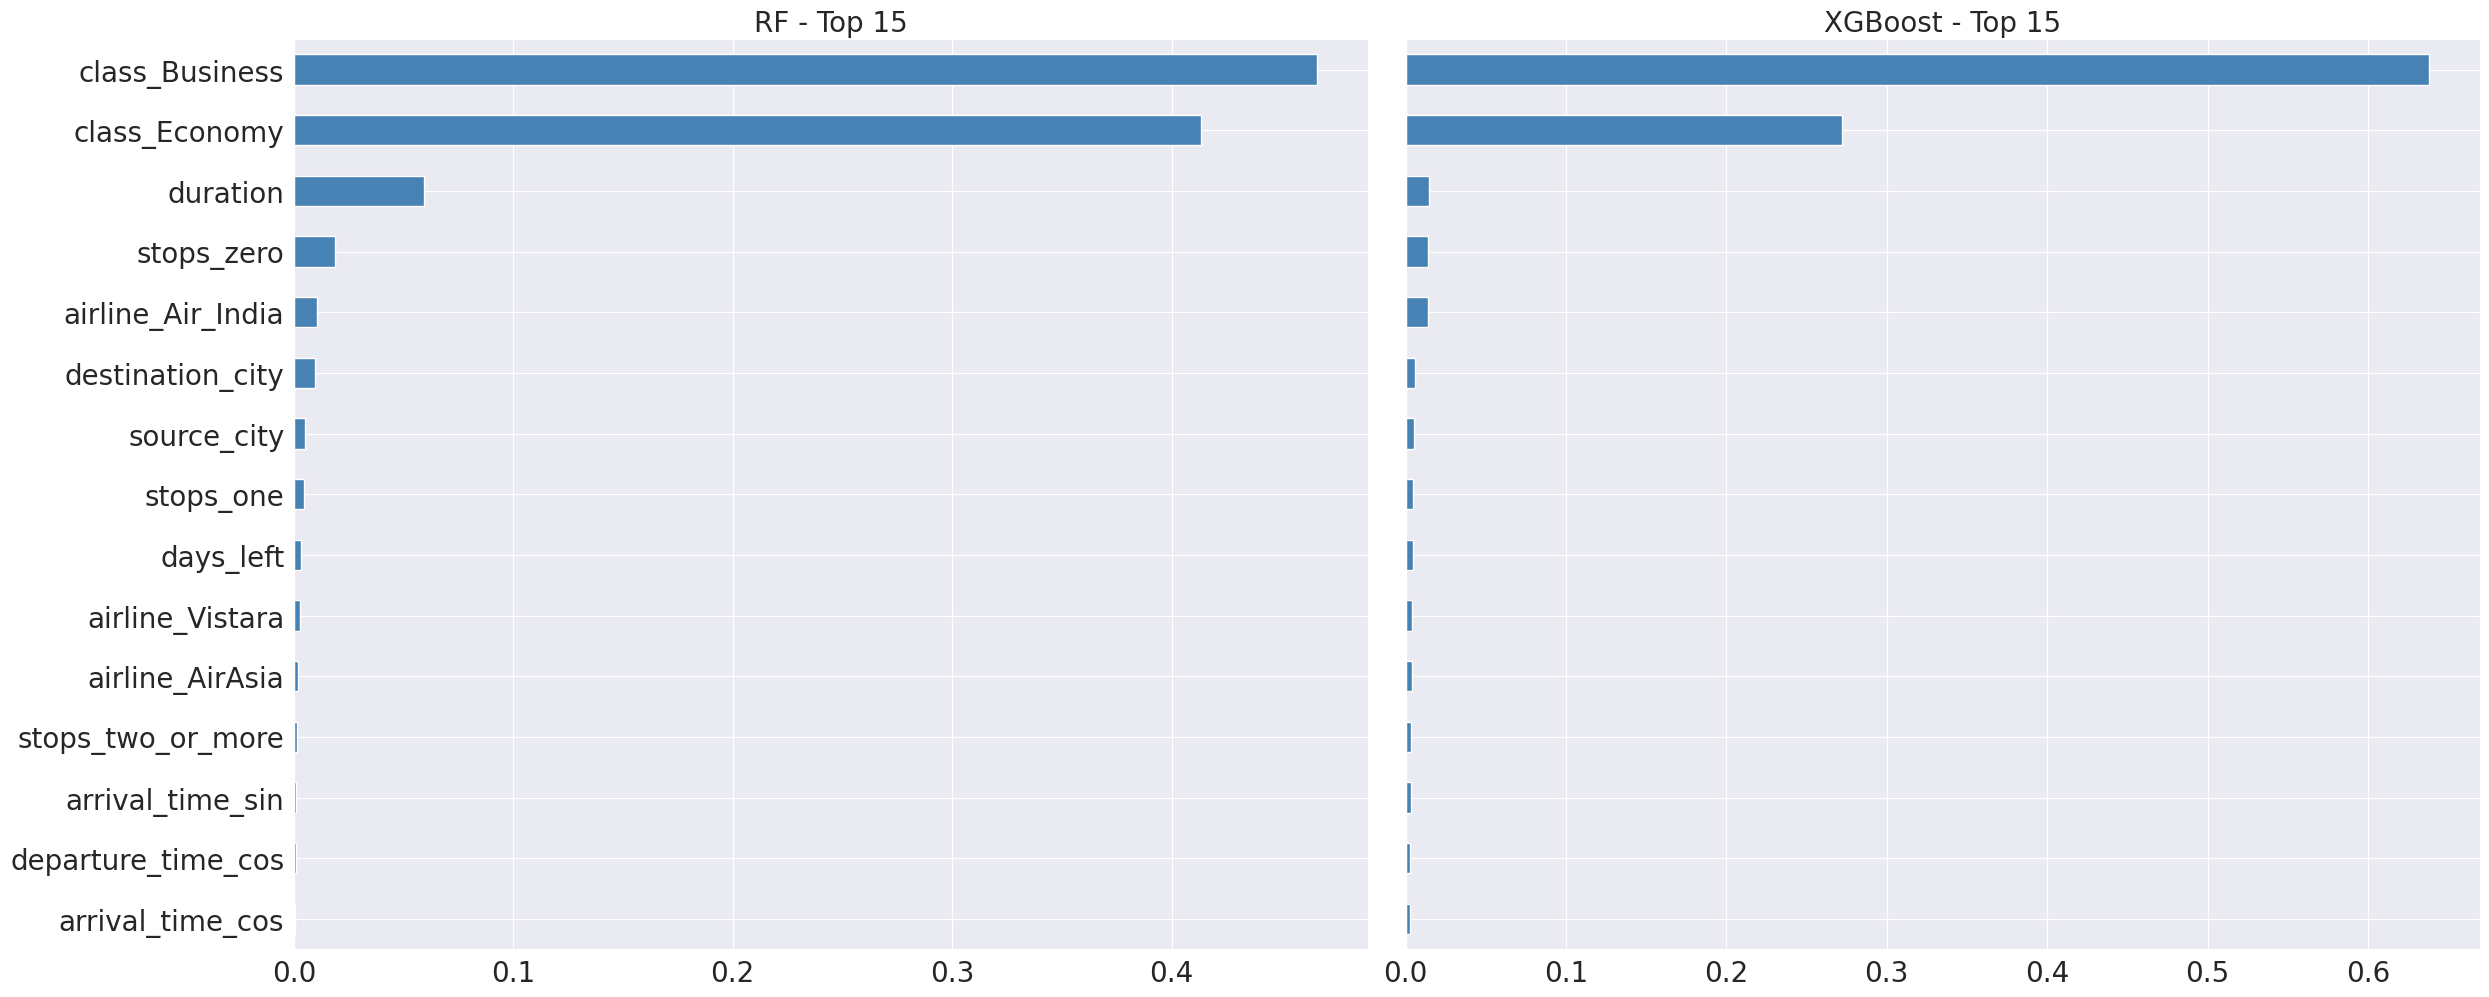

In [107]:
# Feature importances series ordenadas
rf_imp  = pd.Series(rf_model.feature_importances_, index=X_enc.columns).sort_values(ascending=False)
xgb_imp = pd.Series(best_xgb.feature_importances_, index=X_enc.columns).sort_values(ascending=False)

top_k = 15
fig, axs = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

rf_imp.head(top_k).iloc[::-1].plot(kind="barh", ax=axs[0], title="RF - Top 15", fontsize=20, color='steelblue')
xgb_imp.head(top_k).iloc[::-1].plot(kind="barh", ax=axs[1], title="XGBoost - Top 15", fontsize=20, color='steelblue')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

axs[0].set_title("RF - Top 15", fontsize=20)
axs[1].set_title("XGBoost - Top 15", fontsize=20)

plt.show()

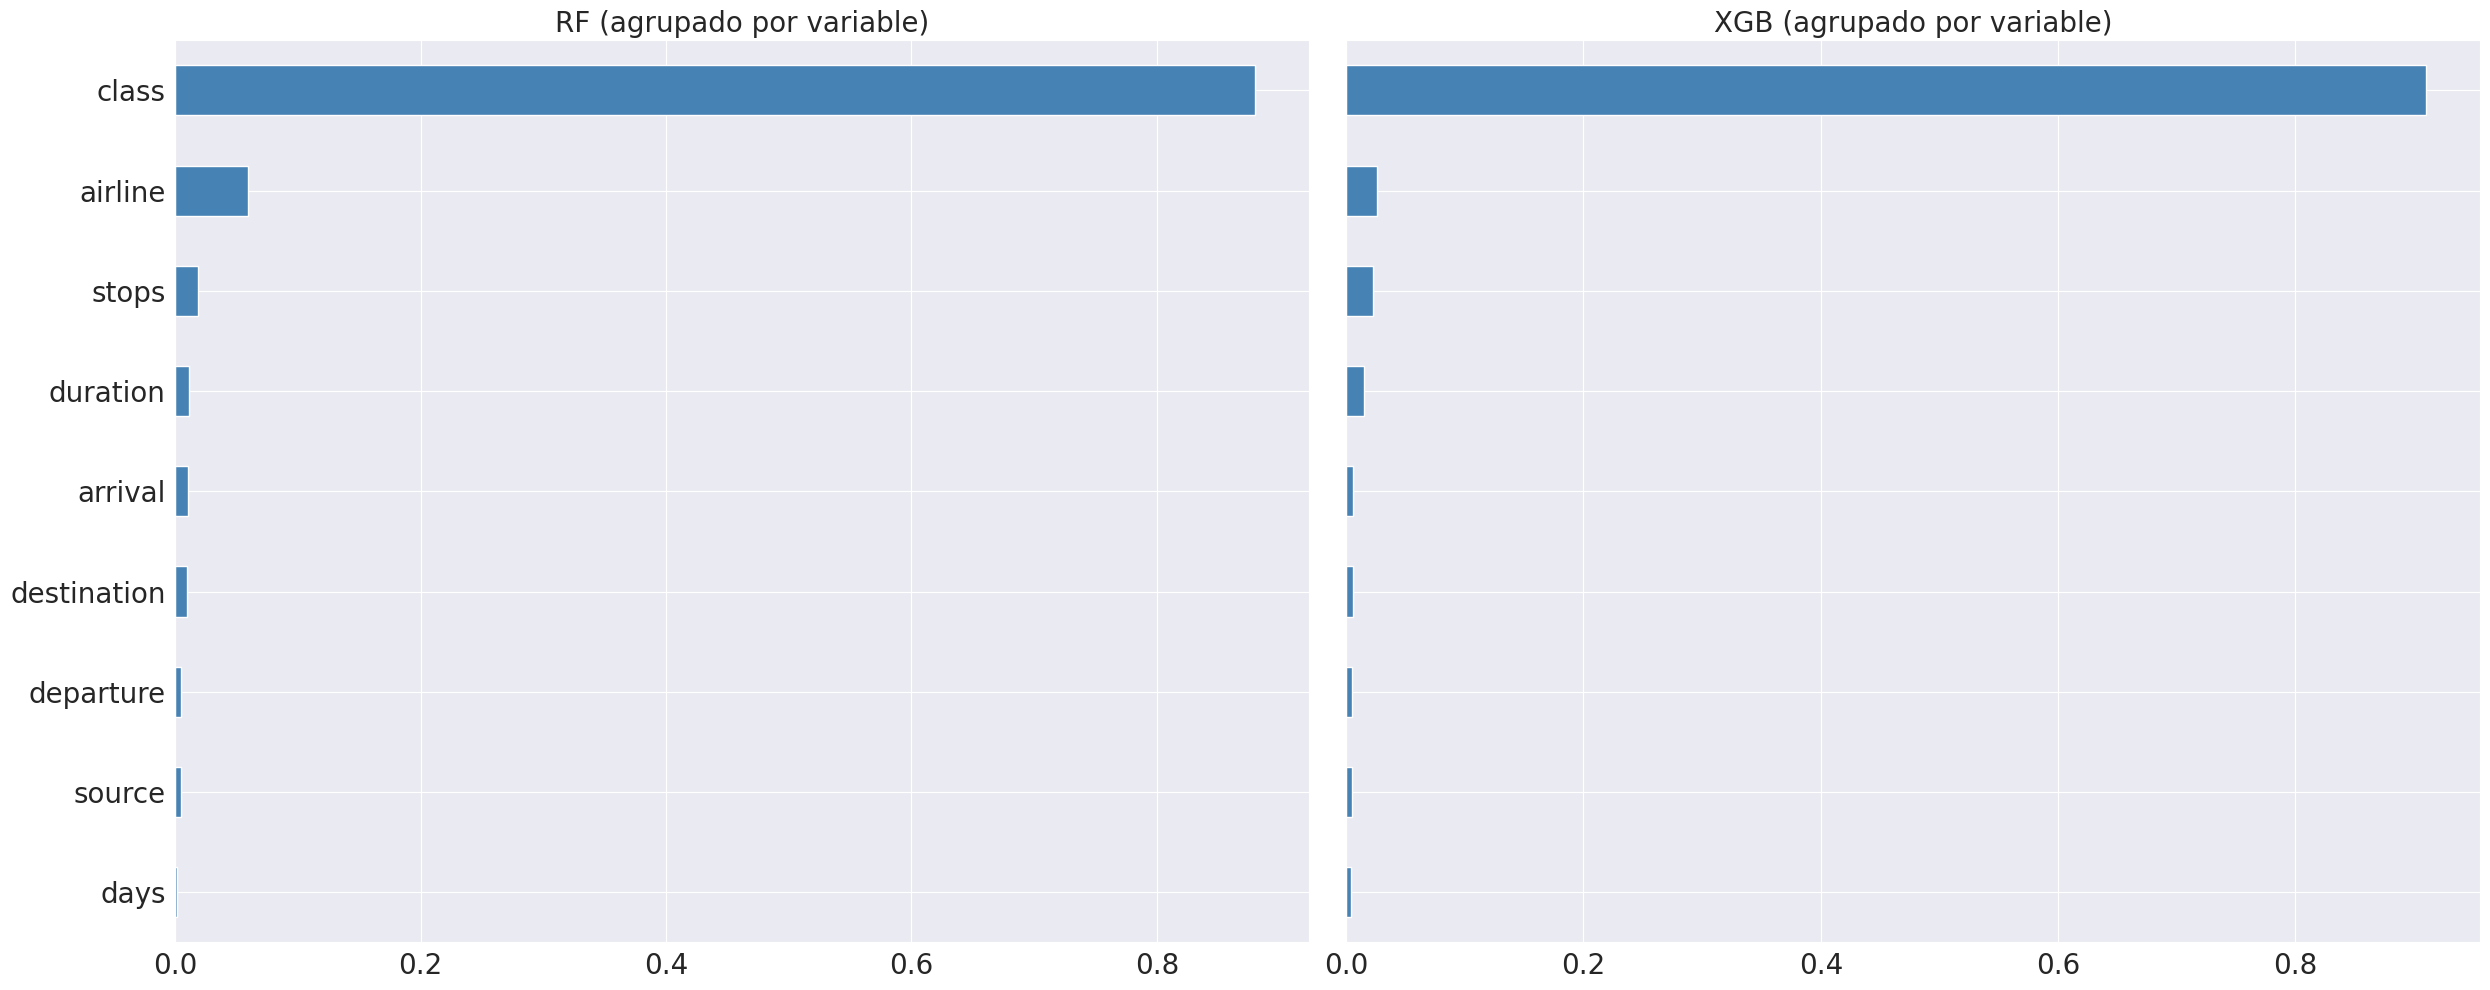

In [108]:
# Feature importances (variables iniciales)
def group_importances(imp_series):
    grp = {}
    for col, val in imp_series.items():
        key = col.split("_")[0]  # prefijo antes del primer "_"
        grp[key] = grp.get(key, 0.0) + val
    return pd.Series(grp).sort_values(ascending=False)

rf_grp  = group_importances(rf_imp)
xgb_grp = group_importances(xgb_imp)

fig, axs = plt.subplots(1, 2, figsize=(25, 10), sharey=True)
rf_grp.head(10).iloc[::-1].plot(kind="barh", ax=axs[0], title="RF (agrupado por variable)", fontsize=20, color='steelblue')
xgb_grp.head(10).iloc[::-1].plot(kind="barh", ax=axs[1], title="XGB (agrupado por variable)", fontsize=20, color='steelblue')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

axs[0].set_title("RF (agrupado por variable)", fontsize=20)
axs[1].set_title("XGB (agrupado por variable)", fontsize=20)

plt.tight_layout()
plt.show()


# **SHAP**

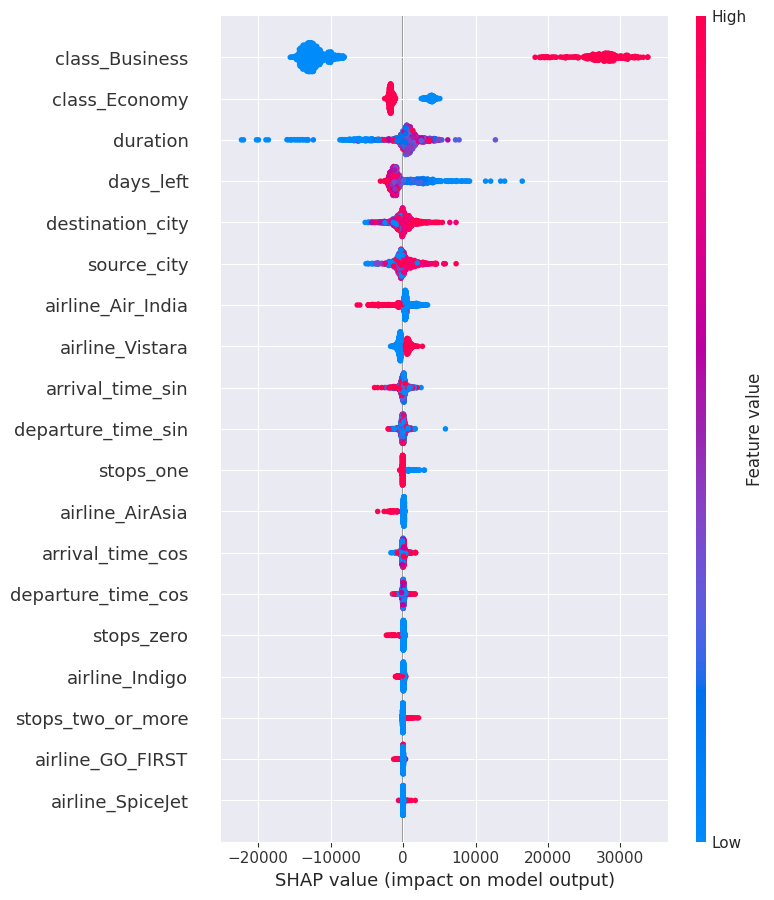

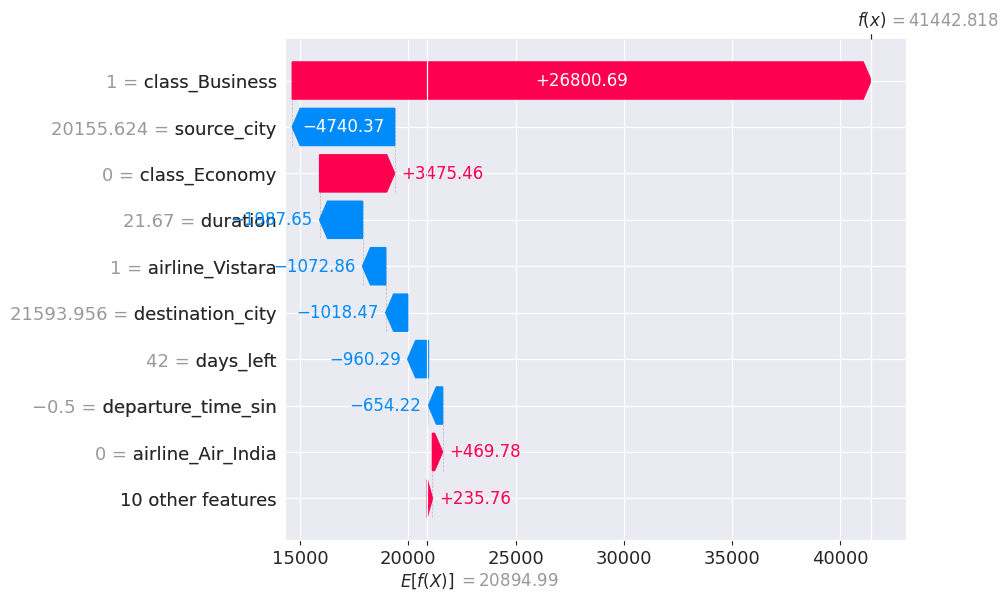

In [62]:
X_shap = X_enc.sample(1000, random_state=42)  # sube a 2000 si puedes

explainer = shap.TreeExplainer(best_xgb)  # sin approximate
shap_vals = explainer.shap_values(X_shap, check_additivity=True)

# Global
shap.summary_plot(shap_vals, X_shap)

# Local
i = 10
shap.waterfall_plot(
    shap.Explanation(values=shap_vals[i],
                     base_values=explainer.expected_value,
                     data=X_shap.iloc[i,:],
                     feature_names=X_shap.columns.tolist())
)


# **INSIGHTS**

## 1. Distribution and Trends
- The dataset shows a wide variability in prices, with extreme cases on both ends (very cheap and very expensive flights).
- The **`class`** variable has a clear impact: **Business** flights have significantly higher prices than **Economy**.
- **`days_left`** (days remaining until the flight) follows the expected trend: the fewer the days left, the higher the price, with sharp increases in the last days before departure.
- **Flight duration** shows an inverse relationship with price for short and direct routes, but for longer routes the relationship is not always linear, likely due to combinations of stops and cities.

---

## 2. Model Results
**RandomForest**:  
- RMSE ≈ **2,720**  
- MAE ≈ **1,065**  
- R² ≈ **0.9856**  
- Strong overall performance, low errors, and high explanatory power, though it tends to make bigger mistakes for high-priced flights.

**XGBoost**:  
- RMSE ≈ **2,454**  
- MAE ≈ **1,258**  
- R² ≈ **0.9883**  
- Slight improvement in RMSE and R² compared to RF, with a small increase in MAE.  
- Cross-validation confirms model stability and generalization.

---

## 3. Feature Importance
In both models, the most influential variables globally are:
1. **class**
2. **days_left**
3. **duration**
4. **stops**
5. Time-related features (`departure_time_sin`, `arrival_time_cos`)
6. Origin/destination cities (moderate importance)

Airline-related features have lower but still relevant impact.

---

## 4. Explainability
Using **SHAP**:
- Not being Business class strongly reduces the predicted price.
- Booking with very few days left significantly increases the price.
- Shorter flight duration tends to lower the price.
- Airline and departure time effects are secondary but still present.

Both models tend to have higher prediction errors for expensive flights, suggesting that extreme values in the dataset are harder to model.

---

## 5. Conclusions and Opportunities
- Both models are robust, but **XGBoost provides a slight edge** in overall accuracy.
- Performance for high-priced flights could be improved by:
  - Balancing the dataset in those price ranges.
  - Using hybrid models or transforming the target variable (e.g., `log(price)`).
- SHAP interpretability adds value in understanding the drivers of price and could be leveraged for dynamic pricing or user recommendations.


### **PLEASE UP VOTE AND SUPPORT MY WORK AS STUDENT!!  :)** Thanks for reading!

##### https://www.linkedin.com/in/adrianzambranaacquaroni/

##### ADRIÁN ZAMBRANA | Aug 2025